In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
#PROBLEM1
df = pd.read_csv('train.csv')

data = df.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]
data

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [48]:
#PROBLEM2
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values

,Total,Percent
SalePrice,0,0.0
YearBuilt,0,0.0
GrLivArea,0,0.0


In [49]:
def plot(data, title):
    fig, axs = plt.subplots(ncols=2, figsize=(16,7))
    
    
    s = sns.boxplot(ax = axs[0], data=data)
   
    s = sns.violinplot(ax = axs[1], data=data)
    fig.suptitle(title)
    plt.show()

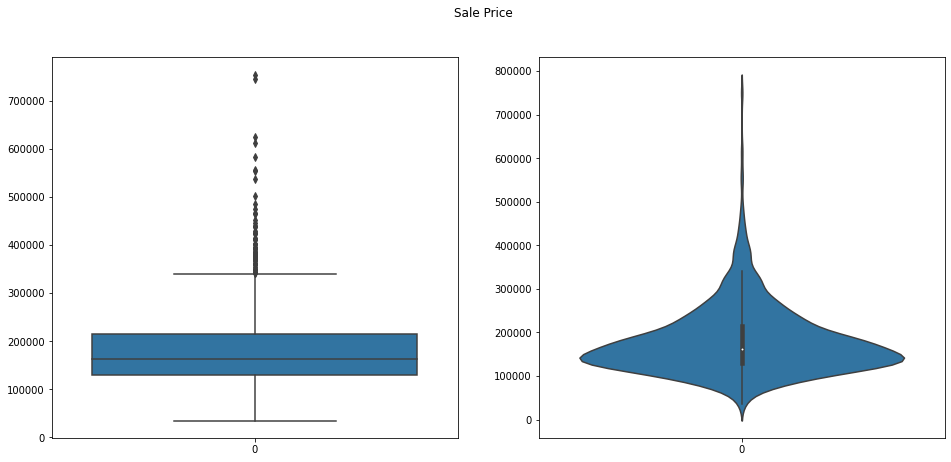

In [50]:
plot(data['SalePrice'], 'Sale Price')

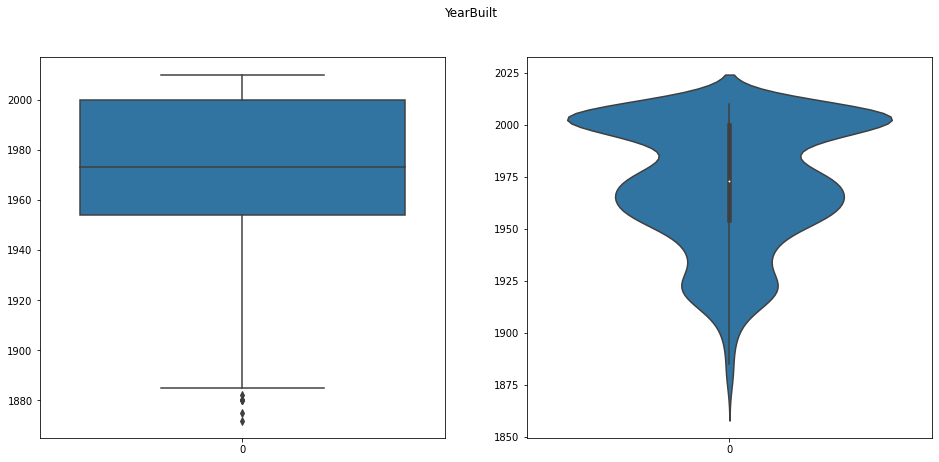

In [51]:
plot(data['YearBuilt'], 'YearBuilt')

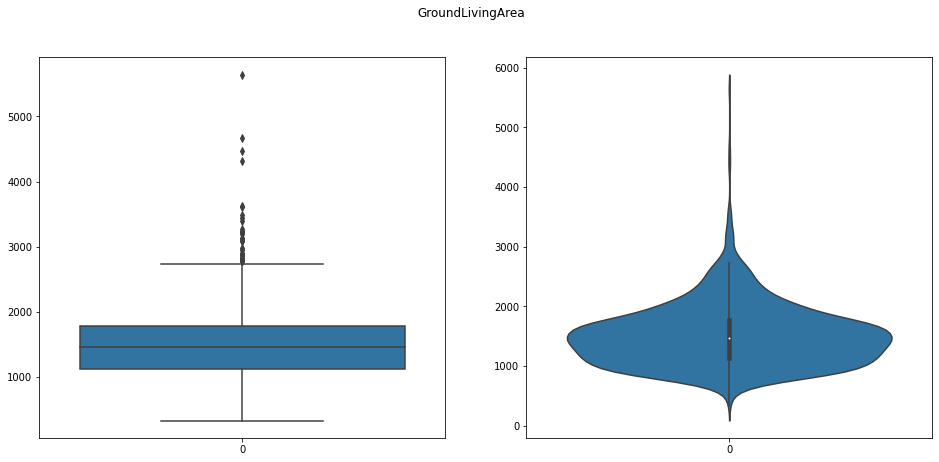

In [52]:
plot(data['GrLivArea'], 'GroundLivingArea')

In [53]:
train_data = data.iloc[:, :-1].to_numpy()
train_label = data['SalePrice'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label)

scaler = StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
reg = LinearRegression().fit(X_train, y_train)
reg.predict(X_test)

array([274488.59610764, 173987.0470721 , 263606.01707123, 182398.20614148,
       149291.55750944, 151324.39895164, 216459.32703235, 172642.9718962 ,
       131634.17925999, 174860.04931587, 235613.48497728, 225544.20211057,
       179551.10558021, 261137.15598184, 245730.14752348, 152684.32234912,
       134019.64443555, 260053.6690432 , 172969.34691219, 134210.92406707,
       140620.77315218, 193350.89174777, 232011.03340686, 268677.07372096,
       175052.12691152, 201160.2022917 ,  62787.15497764, 168450.99819489,
       106649.12887979, 118468.73602518, 151711.27800582, 226131.16536382,
       240336.23768478, 260980.13167113, 283602.44376614, 194749.39025721,
       302900.50166307, 154934.69214022, 237916.51718841, 254098.24670451,
        82499.30359553, 210121.34543063, 233895.65510589, 267444.40408978,
       144807.46411296, 132614.10227207, 233802.65666039, 139918.08456307,
       148914.28098694, 196160.21516121, 198688.61733942, 101749.98181297,
       215620.58010939, 2

In [55]:
reg.score(X_train, y_train)

0.6394498773640617

In [56]:
reg.coef_

array([49044.45151846, 31471.12665174])

In [57]:
reg.intercept_

181211.83926940645

In [58]:
y_pred = reg.predict(X_test)
print('Mean squared error: {}'.format(mean_squared_error(y_test, y_pred)))

Mean squared error: 1823167895.853946


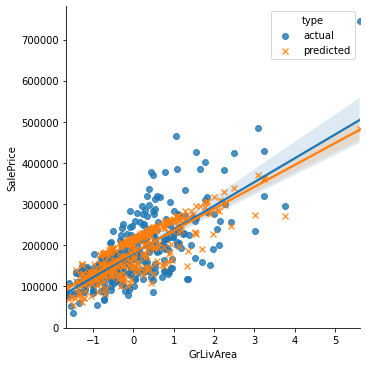

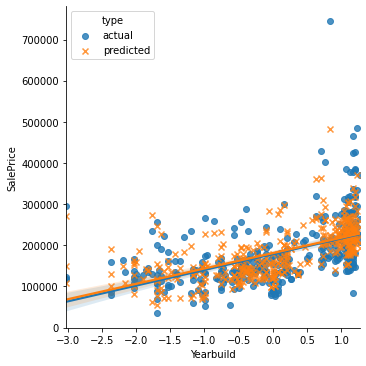

In [59]:
labels = ['actual', 'predicted']
m1 = np.hstack((X_test, y_test[:, None], np.zeros((len(X_test), 1))))
m2 = np.hstack((X_test, y_pred[:, None], np.ones((len(X_test), 1))))
m = pd.DataFrame(np.vstack((m1, m2)), columns= ['GrLivArea', 'Yearbuild'] + ['SalePrice', 'type'])

for c in ['GrLivArea', 'Yearbuild']:
    s = sns.lmplot(x=c, y='SalePrice', data=m,  hue='type', legend_out=False, markers=['o', 'x'])
    leg = s.axes.flat[0].get_legend()
    for t, l in zip(leg.texts, labels): t.set_text(l)

In [80]:
#PROBLEM3
def learn_model(model, cols=['GrLivArea', 'YearBuilt']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Mean squared error: {}'.format(mean_squared_error(y_test, y_pred)))

    labels = ['actual', 'predicted']

    m1 = np.hstack((X_test, y_test[:, None], np.zeros((len(X_test), 1))))
    m2 = np.hstack((X_test, y_pred[:, None], np.ones((len(X_test), 1))))
    m = pd.DataFrame(np.vstack((m1, m2)), columns= cols + ['SalePrice', 'type'])

    for c in cols:
        s = sns.lmplot(x=c, y='SalePrice', data=m,  hue='type', legend_out=False, markers=['o', 'x'])
        leg = s.axes.flat[0].get_legend()
        for t, l in zip(leg.texts, labels): t.set_text(l)

Mean squared error: 6312233857.46971


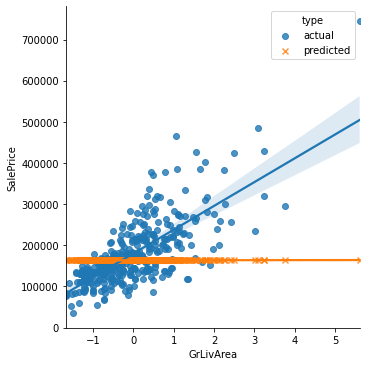

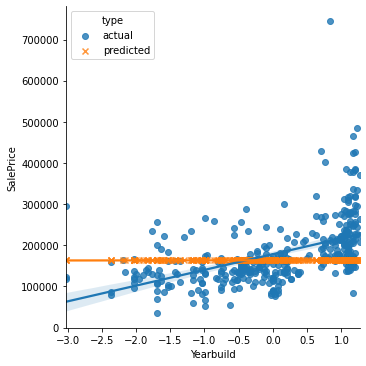

In [62]:
reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
learn_model(reg)

Mean squared error: 2716767692.3325725


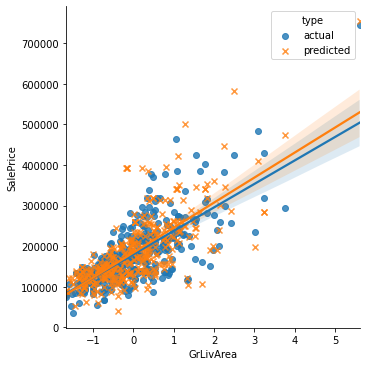

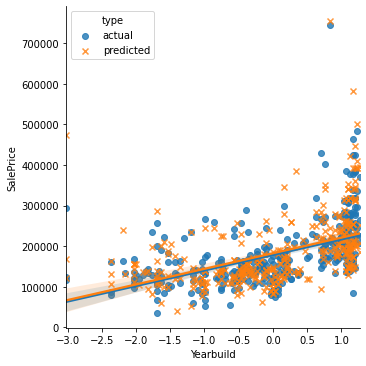

In [63]:
reg = DecisionTreeRegressor(random_state=0)
learn_model(reg)

Mean squared error: 2520751738.7606


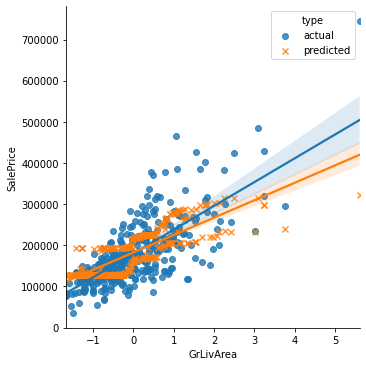

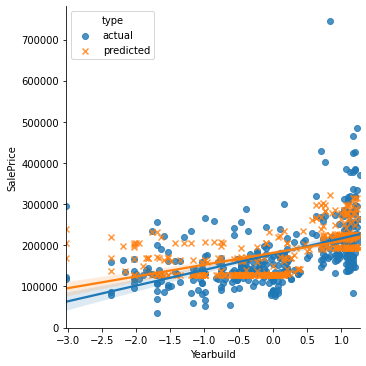

In [64]:
reg = RandomForestRegressor(max_depth=2, random_state=0)
learn_model(reg)

In [76]:
#PROBLEM4
data = df[['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd', 'SalePrice']]

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values

,Total,Percent
SalePrice,0,0.0
YearRemodAdd,0,0.0
OverallQual,0,0.0
YearBuilt,0,0.0
GrLivArea,0,0.0


In [85]:
train_data = data.iloc[:, :-1].to_numpy()
train_label = data['SalePrice'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label)

scaler = StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

Mean squared error: 1052586229.1499649


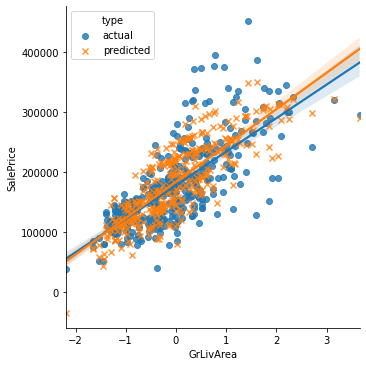

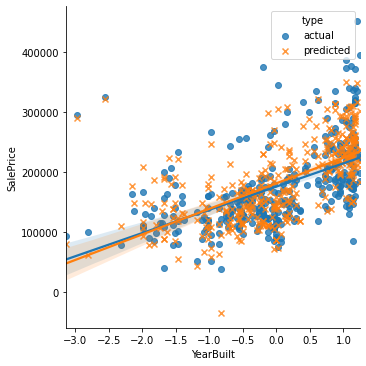

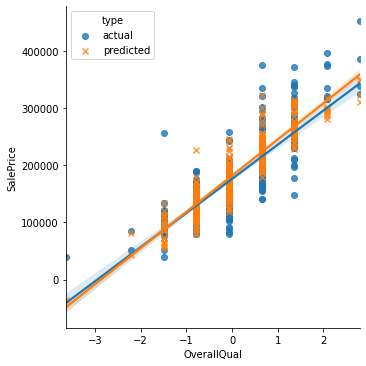

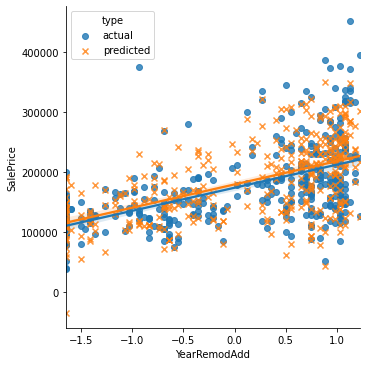

In [86]:
reg = LinearRegression()  
learn_model(reg, cols=['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd'])

Mean squared error: 4889548000.433919


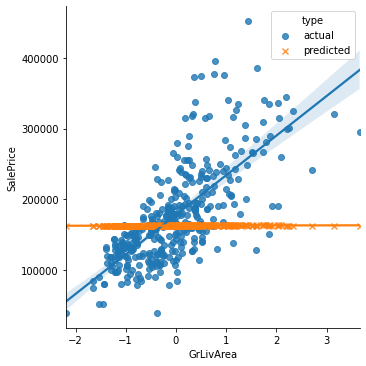

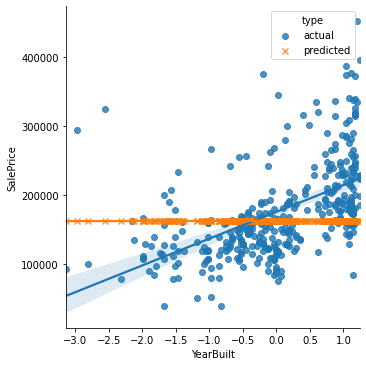

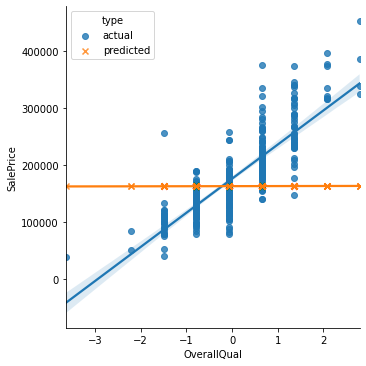

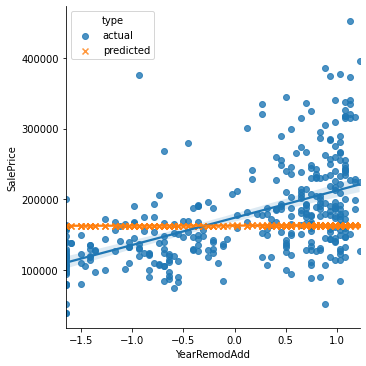

In [87]:
reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
learn_model(reg, cols=['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd'])

Mean squared error: 1416299143.2486334


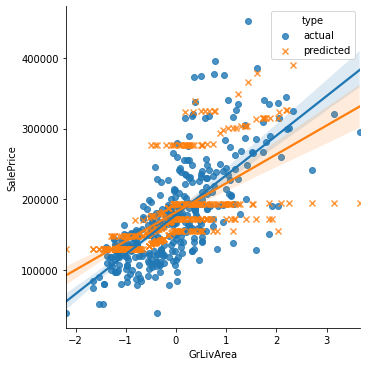

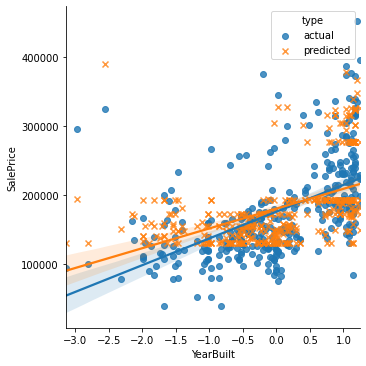

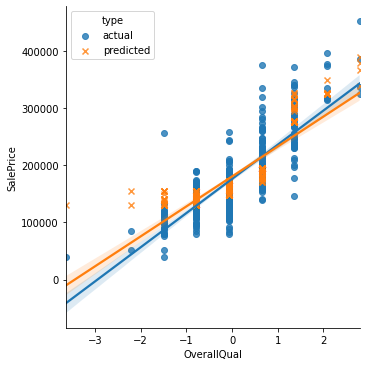

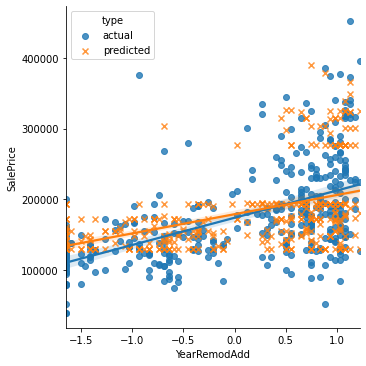

In [88]:
reg = RandomForestRegressor(max_depth=2, random_state=0)
learn_model(reg, cols=['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd'])

Mean squared error: 1862642079.2022069


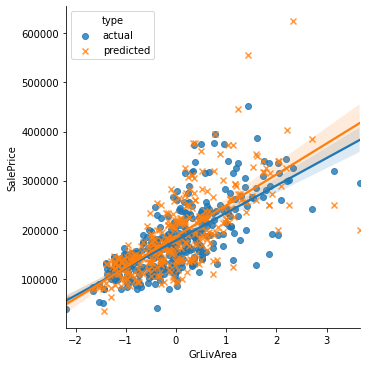

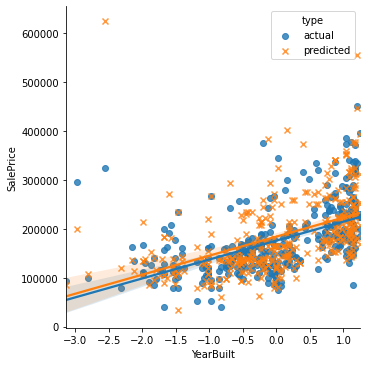

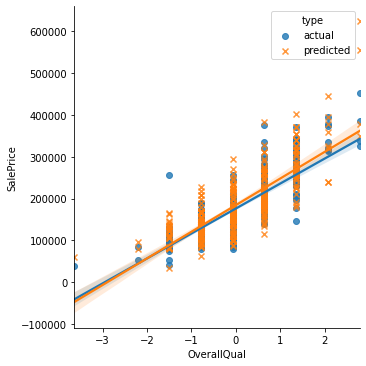

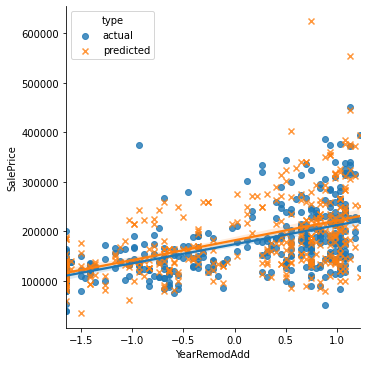

In [89]:
reg = DecisionTreeRegressor(random_state=0)
learn_model(reg, cols=['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd'])